# **Support Vector Machine**
In this code I have used SVM Model to Predict whether a Customer will Purchase the Product or Not.

In [20]:
#Importing Required Libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, recall_score, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

np.set_printoptions(precision=4, linewidth=100)

import warnings
warnings.filterwarnings('ignore')

In [21]:
#Importing the Dataset
df = pd.read_csv("/content/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [23]:
#Defining Dependent and Independent Variables i.e. 'Y' and 'x' resp. 
y = df['Purchased']
X = df.drop('Purchased', axis='columns')

In [24]:
X.head()

,User ID,Gender,Age,EstimatedSalary
0,15624510,Male,19,19000
1,15810944,Male,35,20000
2,15668575,Female,26,43000
3,15603246,Female,27,57000
4,15804002,Male,19,76000


In [25]:
dummies = pd.get_dummies(X.Gender)
dummies.head()

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


In [26]:
X = pd.concat([X, dummies], axis = 'columns')
X.drop(['Gender', 'Male'], axis = 'columns', inplace = True)
X.head()

,User ID,Age,EstimatedSalary,Female
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,1
3,15603246,27,57000,1
4,15804002,19,76000,0


In [27]:
#Now we split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [28]:
# Feature Scaling to standardise
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [29]:
#Applying Model
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [30]:
#Making Prediciton 1
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1])

In [31]:
#Checking Accuracy
print(accuracy_score(y_test, y_pred))

0.88


In [32]:
#Applying Model with different Parameters
classifier = SVC(kernel = 'rbf', gamma = 5, C = 7, random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=7, gamma=5, random_state=0)

In [33]:
#Making Prediciton 2
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1])

In [34]:
#Checking Accuracy
print(accuracy_score(y_test, y_pred))

0.89


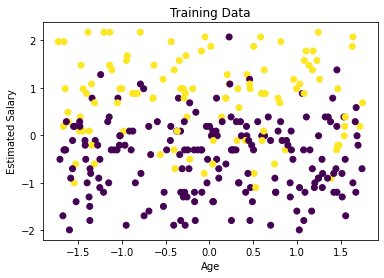

In [35]:
#Plotting the Data on Graph
#Training Data
plt.scatter(X_train[ : , 0], X_train[ : , 1], c = y_train)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Training Data')
plt.show()

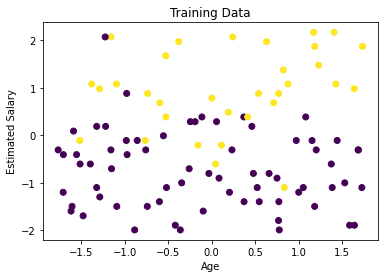

In [36]:
#Test Data
plt.scatter(X_test[ : , 0], X_test[ : , 1], c = y_test)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Training Data')
plt.show()

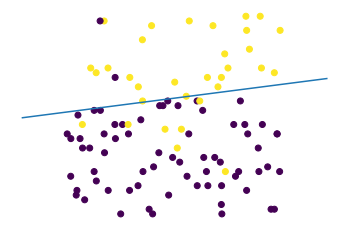

In [40]:
#With Hyperplane
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

plt.scatter(X_test[ : , 0], X_test[ : , 1], c = y_test)

w = classifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (classifier.intercept_[0]) / w[1]

plt.plot(xx, yy)
plt.axis('off'), 
plt.show()